List of all Possible Dimensionality Techniques and when to use them
Dimensionality reduction techniques can be classified into two 3 types
Feature selection:
a) Missing Value Ratio: If the dataset has too many missing values, we use this approach to reduce the number of variables. We can drop the variables having a large number of missing values in them.


b) Low Variance filter: We apply this approach to identify and drop constant variables from the dataset. The target variable is not unduly affected by variables with low variance, and hence these variables can be safely dropped.


c) High Correlation filter: A pair of variables having high correlation increases multicollinearity in the dataset. So, we can use this technique to find highly correlated features and drop them accordingly.


d) Random Forest: This is one of the most commonly used techniques which tells us the importance of each feature present in the dataset. We can find the importance of each feature and keep the top most features, resulting in dimensionality reduction.


e) Both Backward Feature Elimination and Forward Feature Selection techniques take a lot of computational time and are thus generally used on smaller datasets.

Components / Factor Based:

a) Factor Analysis: This technique is best suited for situations where we have highly correlated set of variables. It divides the variables based on their correlation into different groups, and represents each group with a factor.

b) Principal Component Analysis: This is one of the most widely used techniques for dealing with linear data. It divides the data into a set of components which try to explain as much variance as possible.

c) Independent Component Analysis: We can use ICA to transform the data into independent components which describe the data using less number of components.

Projection Based:

a) ISOMAP: We use this technique when the data is strongly non-linear.

b) t-SNE: This technique also works well when the data is strongly non-linear. It works extremely well for visualizations as well.

c) UMAP: This technique works well for high dimensional data. Its run-time is shorter as compared to t-SNE.

In [137]:
%matplotlib inline 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  recall_score, roc_auc_score, precision_score

from sklearn import model_selection
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [138]:
#Loading the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

1. Import and warehouse data:

• Import all the given datasets and explore shape and size.

In [139]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

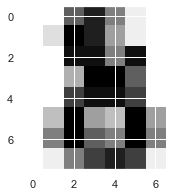

In [140]:
#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [141]:
#two-dimensional,[n_samples, n_features] representation
X = digits.data
y = digits.target
print(y.shape)
print(X.shape)

(1797,)
(1797, 64)


In [142]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

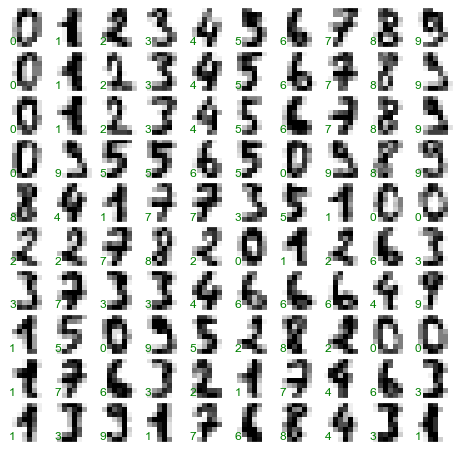

In [143]:
# visualize the first hundred of these
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
    transform=ax.transAxes, color='green')

In [144]:
XScaled=X #scaling is not required as all the values in the dataset are below 255

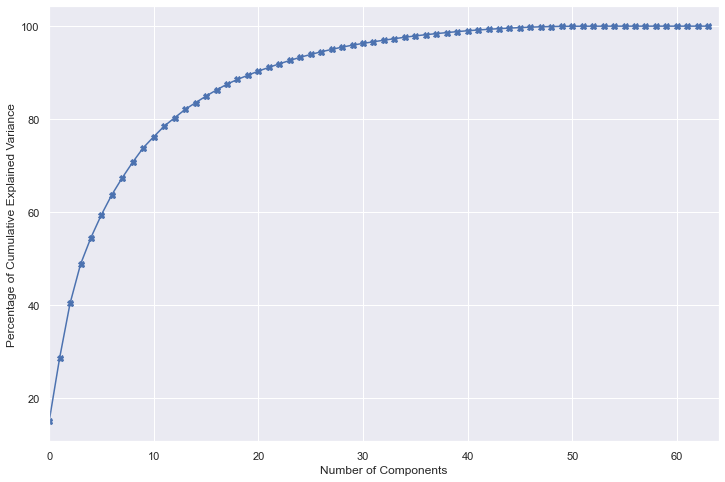

In [145]:
#plotting the cummulative variance explained by the principal componets
pca = PCA()
X_pca_ = pca.fit_transform(XScaled)
plt.figure(figsize = (12, 8))
plt.plot((np.cumsum(pca.explained_variance_ratio_) * 100), marker = 'X')
plt.xlim(0, 64)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance');

In [146]:
print(pca.explained_variance_)

[1.79006930e+02 1.63717747e+02 1.41788439e+02 1.01100375e+02
 6.95131656e+01 5.91085249e+01 5.18845391e+01 4.40151067e+01
 4.03109953e+01 3.70117984e+01 2.85190412e+01 2.73211698e+01
 2.19014881e+01 2.13243565e+01 1.76367222e+01 1.69468639e+01
 1.58513899e+01 1.50044602e+01 1.22344732e+01 1.08868593e+01
 1.06935663e+01 9.58259779e+00 9.22640260e+00 8.69036872e+00
 8.36561190e+00 7.16577961e+00 6.91973881e+00 6.19295508e+00
 5.88499123e+00 5.15586690e+00 4.49129656e+00 4.24687799e+00
 4.04743883e+00 3.94340334e+00 3.70647245e+00 3.53165306e+00
 3.08457409e+00 2.73780002e+00 2.67210896e+00 2.54170563e+00
 2.28298744e+00 1.90724229e+00 1.81716569e+00 1.68996439e+00
 1.40197220e+00 1.29221888e+00 1.15893419e+00 9.31220008e-01
 6.69850594e-01 4.86065217e-01 2.52350432e-01 9.91527944e-02
 6.31307848e-02 6.07377581e-02 3.96662297e-02 1.49505636e-02
 8.47307261e-03 3.62365957e-03 1.27705113e-03 6.61270906e-04
 4.12223305e-04 1.14286697e-30 1.14286697e-30 1.12542605e-30]


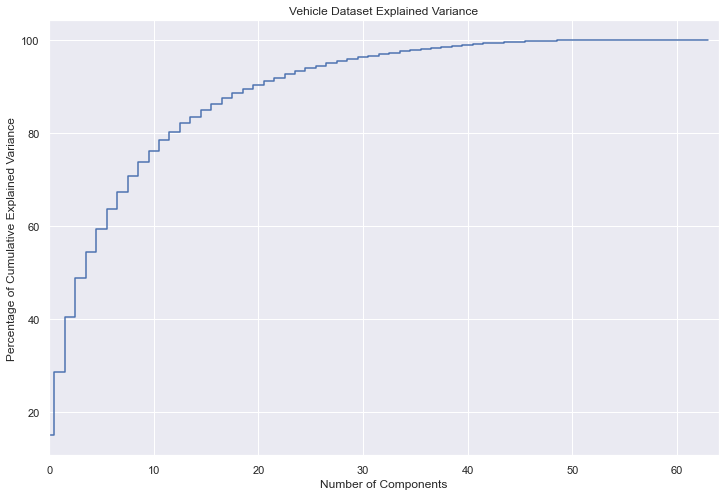

In [147]:
#plotting the
plt.figure(figsize = (12, 8))
plt.step(list(range(64)), (np.cumsum(pca.explained_variance_ratio_) * 100), where = 'mid')
plt.xlim(0, 64)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance')
plt.title('Vehicle Dataset Explained Variance');

In [148]:
#printing the original features and the reduced features
pca_6 = PCA(n_components = 20)
X_pca = pca_6.fit_transform(XScaled)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 64
Reduced number of features: 20


In [149]:
#viewing the first 5 observations of the pca components
pca_df = pd.DataFrame(data = X_pca)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.259463,21.274883,-9.463059,13.014174,-7.128867,-7.440794,3.252489,2.553301,-0.581704,3.622863,2.585718,1.552597,0.843995,-3.326385,5.916232,2.751483,0.446044,-0.971980,0.732975,-3.304413
1,7.957611,-20.768699,4.439505,-14.893663,5.896233,-6.485689,2.126134,-4.615941,3.586760,-1.074346,-5.387208,-2.131916,-2.551960,-6.518252,-2.273352,-2.127064,-5.845181,4.486456,-1.899675,-5.105280
2,6.991925,-9.955987,2.958557,-12.288294,-18.126045,-4.507947,1.842837,-16.414887,0.718820,4.254528,-1.231624,-0.384577,0.203961,6.853308,-1.655011,-4.244424,6.749503,1.216456,0.251671,8.823565
3,-15.906106,3.332465,9.824373,-12.275843,6.965196,1.089631,-1.041881,10.973438,-3.259215,6.499532,-5.065951,2.397520,2.656911,-4.544705,0.776570,1.637375,-2.259190,-1.374900,3.002129,-4.136908
4,23.306869,4.269061,-5.675131,-13.851535,-0.358139,-2.857525,-0.720587,13.041611,-3.834861,13.412667,2.673418,-1.753869,-5.292431,1.520804,-0.676143,-6.430228,-9.505895,-1.995434,-3.119033,4.966414


In [150]:
#splitting the original data into train and test 70:30
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size = 0.3, random_state = 10)
rtr, ctr = X_train.shape

In [151]:
print('The training set comprises of', rtr, 'rows and', ctr, 'columns.')

The training set comprises of 1257 rows and 64 columns.


In [152]:
rt, ct = X_test.shape
print('The test set comprises of', rt, 'rows and', ct, 'columns.')

The test set comprises of 540 rows and 64 columns.


In [153]:
#splitting the pca data into train and test 70:30
X_tr, X_te, y_tr, y_te = train_test_split(X_pca, y, test_size = 0.3, random_state = 10)
rtr_pca, ctr_pca = X_tr.shape

In [154]:
print('The PCA training set comprises of', rtr_pca, 'rows and', ctr_pca, 'columns.')

The PCA training set comprises of 1257 rows and 20 columns.


In [155]:
rt_pca, ct_pca = X_te.shape

In [156]:
print('The PCA test set comprises of', rt_pca, 'rows and', ct_pca, 'columns.')

The PCA test set comprises of 540 rows and 20 columns.


In [157]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= 4, kernel='rbf', gamma='scale')
svc_model.fit(X_train, y_train)

SVC(C=4)

In [158]:

#predicting on train data
sv_train_predict = svc_model .predict(X_train)
print("Model Accuracy on train: {0:.4f}".format(metrics.accuracy_score(y_train, sv_train_predict)))
print()

Model Accuracy on train: 1.0000



In [159]:
#predicting on test data
sv_test_predict = svc_model .predict(X_test)
print("Model Accuracy on test: {0:.4f}".format(metrics.accuracy_score(y_test, sv_test_predict)))
print()

Model Accuracy on test: 0.9833



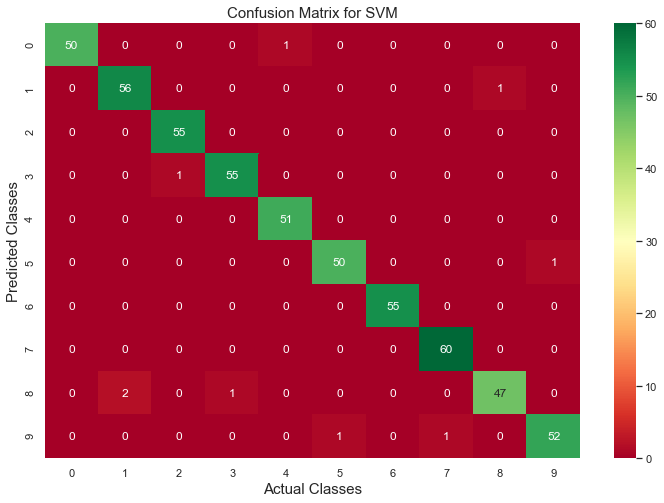

In [160]:
#visualization of confusion matrix in the form of a heatmap
cm= confusion_matrix(y_test, sv_test_predict)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

In [161]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, sv_test_predict, labels=[0,1,2]))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.97      0.98      0.97        57
           2       0.98      1.00      0.99        55

   micro avg       0.98      0.99      0.98       163
   macro avg       0.98      0.99      0.99       163
weighted avg       0.98      0.99      0.98       163



In [162]:
precision_SV, recall_SV, f1_score_SV, support = precision_recall_fscore_support(y_test, sv_test_predict,average='macro')
print('Precision Score :', '%0.2f' % precision_SV)
print('Recall Score :', '%0.2f' % recall_SV)
print('F1-Score:', '%0.2f' % f1_score_SV)
SV_Acc= accuracy_score(y_test, sv_test_predict)
print('Accuracy Score :','%0.2f' % SV_Acc)

Precision Score : 0.98
Recall Score : 0.98
F1-Score: 0.98
Accuracy Score : 0.98


In [163]:
#SVM on the pca data
svc_model_pca = SVC(C= 4, kernel='rbf', gamma='scale')
svc_model_pca.fit(X_tr, y_tr)

SVC(C=4)

In [164]:
#predicting on train data
sv_tr_predict = svc_model_pca .predict(X_tr)
print("Model Accuracy on train: {0:.4f}".format(metrics.accuracy_score(y_tr, sv_tr_predict)))
print()

Model Accuracy on train: 1.0000



In [165]:
#predicting on test data
sv_te_predict = svc_model_pca .predict(X_te)
print("Model Accuracy on test: {0:.4f}".format(metrics.accuracy_score(y_te, sv_te_predict)))
print()

Model Accuracy on test: 0.9870



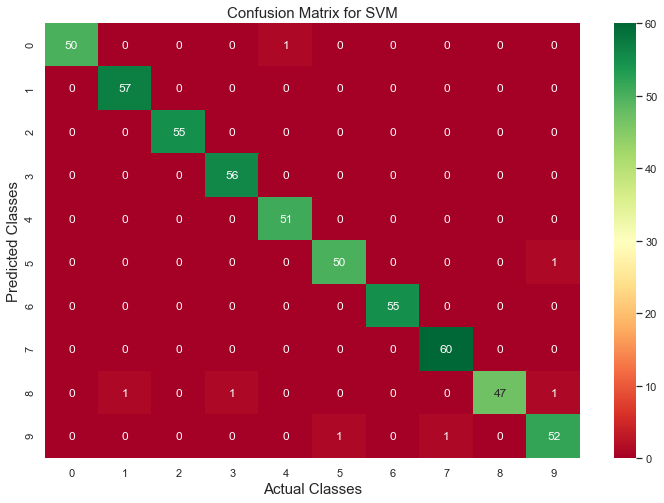

In [166]:
#visualization of confusion matrix in the form of a heatmap
cm= confusion_matrix(y_te, sv_te_predict)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

In [167]:
precision_SV_pca, recall_SV_pca, f1_score_SV_pca, support_pca = precision_recall_fscore_support(y_te, sv_te_predict,average='macro')
print('Precision Score :', '%0.2f' % precision_SV_pca)
print('Recall Score :', '%0.2f' % recall_SV_pca)
print('F1-Score:', '%0.2f' % f1_score_SV_pca)
SV_Acc_pca= accuracy_score(y_te, sv_te_predict)
print('Accuracy Score :','%0.2f' % SV_Acc_pca)

Precision Score : 0.99
Recall Score : 0.99
F1-Score: 0.99
Accuracy Score : 0.99


In [168]:
modellists = []
modellists.append(['Support Vector Classifier without PCA', SV_Acc * 100, recall_SV * 100, precision_SV * 100,f1_score_SV*100])
modellists.append(['Support Vector Classifier with PCA', SV_Acc_pca* 100, recall_SV_pca * 100, precision_SV_pca * 100,f1_score_SV_pca*100])
mdl_df = pd.DataFrame(modellists, columns = ['Model','Accuracy Score of Test Data', 'Recall Score', 'Precision Score','F1 Score'])
mdl_df

,Model,Accuracy Score of Test Data,Recall Score,Precision Score,F1 Score
0,Support Vector Classifier without PCA,98.333333,98.283463,98.348696,98.307111
1,Support Vector Classifier with PCA,98.703704,98.637473,98.729457,98.670079




With the help of PCA we have reduced 64 components to 20 and the accuracy on test data with PCA is more than without PCA.
